In [42]:
import pandas as pd
import numpy as np
from keras.layers import Input,Dense, Embedding, Flatten, Add, Subtract
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [63]:
games_tourney=pd.read_csv('datasets_495447_920088_games_tourney.csv')
games_tourney_train=games_tourney[:3500]
games_tourney_test=games_tourney[3500:4200]
games_tourney_pred=games_tourney[4200:]
games_tourney_train.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [64]:
games_tourney_train[['seed_diff','score_diff','score_1','score_2']].head()

,seed_diff,score_diff,score_1,score_2
0,-3,-9,41,50
1,4,6,61,55
2,5,-4,59,63
3,3,9,50,41
4,1,-9,54,63


In [65]:
x=games_tourney_train[['seed_diff','score_diff']]
y=games_tourney_train[['score_1','score_2']]
x.head()

,seed_diff,score_diff
0,-3,-9
1,4,6
2,5,-4
3,3,9
4,1,-9


In [66]:
input_tensor=Input(shape=(2,))
output_tensor=Dense(2)(input_tensor)

In [67]:
model=Model(input_tensor,output_tensor)

In [68]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [69]:
history=model.fit(x,y, epochs=800)

Epoch 1/800
110/110 [==============================] - 0s 535us/step - loss: 71.4906
Epoch 2/800
110/110 [==============================] - 0s 486us/step - loss: 71.3806
Epoch 3/800
110/110 [==============================] - 0s 486us/step - loss: 71.2714
Epoch 4/800
110/110 [==============================] - 0s 428us/step - loss: 71.1606
Epoch 5/800
110/110 [==============================] - 0s 427us/step - loss: 71.0501
Epoch 6/800
110/110 [==============================] - 0s 425us/step - loss: 70.9415
Epoch 7/800
110/110 [==============================] - 0s 428us/step - loss: 70.8315
Epoch 8/800
110/110 [==============================] - 0s 452us/step - loss: 70.7223
Epoch 9/800
110/110 [==============================] - 0s 473us/step - loss: 70.6106
Epoch 10/800
110/110 [==============================] - 0s 489us/step - loss: 70.5003
Epoch 11/800
110/110 [==============================] - 0s 487us/step - loss: 70.3899
Epoch 12/800
110/110 [==============================] - 0s 463u

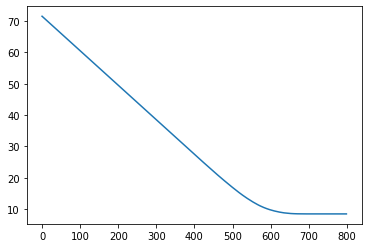

In [73]:
plt.plot(history.history['loss'])

In [74]:
x_test=games_tourney_test[['seed_diff','score_diff']]
y_test=games_tourney_test[['score_1','score_2']]

In [75]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 480us/step - loss: 7.5028


7.502761363983154

In [76]:
x_pred=games_tourney_pred[['seed_diff','score_diff']]
y_pred=games_tourney_pred[['score_1','score_2']]

In [77]:
model.predict(x_pred)

array([[66.99938 , 74.99733 ],
       [81.9991  , 60.003098],
       [90.479065, 51.487225],
       [89.980576, 51.98848 ],
       [69.00178 , 73.00045 ],
       [65.00542 , 77.00234 ],
       [62.490467, 79.48693 ],
       [76.48196 , 65.48437 ],
       [73.50788 , 68.50814 ],
       [73.0122  , 69.0121  ],
       [69.00178 , 73.00045 ],
       [70.511314, 71.51024 ],
       [74.9921  , 66.993546],
       [71.99554 , 69.99564 ],
       [76.00596 , 66.00729 ],
       [60.983746, 80.97985 ],
       [72.471535, 69.47272 ],
       [83.95932 , 57.965584],
       [68.483604, 73.482735],
       [75.98346 , 65.98562 ],
       [74.485176, 67.48667 ],
       [67.97949 , 73.97857 ],
       [72.49965 , 69.49981 ],
       [65.01104 , 77.00776 ],
       [68.01324 , 74.01108 ],
       [72.51371 , 69.51335 ],
       [77.002945, 65.00479 ],
       [71.505486, 70.50502 ],
       [69.51995 , 72.51816 ],
       [66.008026, 76.00526 ],
       [70.02407 , 72.02232 ],
       [58.55597 , 83.54842 ],
       [

In [78]:
y_pred

,score_1,score_2
4200,77,85
4201,87,65
4202,103,64
4203,100,62
4204,63,67
4205,67,79
4206,80,97
4207,86,75
4208,76,71
4209,82,78


In [79]:
model.get_weights()

[array([[ 0.00281205,  0.00270896],
        [ 0.49849084, -0.5012525 ]], dtype=float32),
 array([70.99574, 70.99544], dtype=float32)]